## Knowledge diffusion in malaria from machine learning

The plan here is to reproduce everything Siwo did and try and derive some more value from the data, including some visualizations. The main question we seek to answer is:
- How well has machine learning been adopted by Biologists?
- Compared with other fields, how well has machine learning been adopted?

In [1]:
from Bio import Entrez
import pandas as pd

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Entrez.email = "calebkibet88@gmail.com"

In [3]:
other_tech = ['"DNA sequencing"', '"PCR"',
              '"ELISA"','"microarray"',
              '"Sanger sequencing"','"Nanopore sequencing"',
              '"GWAS"']

In [4]:
ml = ['"machine learning"','"neural networks"',
     '"support vector machine"',
     '"k-nearest neighbor"',
     '"linear regression"',
     '"random forests"',
     '"logistic regression"',
     '"convolutional neural networks"','"bayesian networks "']

## Download data Details from PubMed

Using the code below, we get to fetch the data we are interested which talks about malaria and the various machine learning models. 

In [51]:
# make a placeholder to store result from querying 
def get_count(disease,ml):
    df = pd.DataFrame(columns=["ML_algorithm", "Count", 'First_Paper','Latest_paper'])
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        
        handle_1 = Entrez.esummary(db="pubmed", id = kenyan_pubids[0])
        handle_2 = Entrez.esummary(db="pubmed", id = kenyan_pubids[-1])
        
        record_1 = Entrez.read(handle_1)
        record_2 = Entrez.read(handle_2)
        # see what we are capable of subsetting
        
        df.loc[len(df)]= [machine.replace('"',''), len(kenyan_pubids), record_2[0]["PubDate"],record_1[0]["PubDate"]]
        
    #df.to_csv()
    return df
        

In [82]:
cancer_df = get_count("cancer",ml)
cancer_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,3095,1990 Oct,2019 Apr 24
1,neural networks,2489,1989 May,2019 Apr 1
2,support vector machine,1970,2000 Oct,2019 Apr 22
3,k-nearest neighbor,291,1992 Jun,2019 Apr
4,linear regression,7891,1975 Jun,2019 Apr 24
5,random forests,214,2003 Apr 1,2019 May
6,logistic regression,41323,1976,2018 Fall
7,convolutional neural networks,268,2013,2019 Apr 23
8,bayesian networks,126,1995,2019 Apr


In [83]:
malaria_df = get_count("malaria",ml)
malaria_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,74,2008 Apr 16,2019 Jan 16
1,neural networks,31,2001,2019 Mar 27
2,support vector machine,21,2008 Feb 15,2019 Mar
3,k-nearest neighbor,7,2010 Mar,2019 Apr 1
4,linear regression,219,1983 Dec,2018 Oct-Dec
5,random forests,6,2013 Feb 11,2018 Feb 14
6,logistic regression,1021,1987 Oct,2019 Apr 18
7,convolutional neural networks,3,2018,2018 Sep 25
8,bayesian networks,3,2015 Aug 28,2018 Jan


In [54]:
other_tech_cancer = get_count("cancer",other_tech)
other_tech_cancer

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,5548,1978 Jun 27,2019 Apr 23
1,PCR,105137,1978 Mar,2019 Apr 25
2,ELISA,20642,1978,2019 Apr 24
3,microarray,32536,1953 Jan,2019 Apr 24
4,Sanger sequencing,1939,1995 Feb,2019 Apr 16
5,Nanopore sequencing,30,2013 Jan,2019 Apr 23
6,GWAS,2222,1997 Feb,2019 Apr 23


In [55]:
other_tech_malaria = get_count("malaria",other_tech)
other_tech_malaria

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,187,1988 Feb,2019 Apr 11
1,PCR,4296,1983 Dec,2019 Apr 22
2,ELISA,1775,1976,2019 Apr 24
3,microarray,357,2000 Jan,2019 Mar 27
4,Sanger sequencing,29,2012 May,2019 Apr 18
5,Nanopore sequencing,1,2018 May 29,2018 May 29
6,GWAS,32,2008 Jul 1,2018 Dec 4


In [56]:
tuberculosis_df = get_count("tuberculosis",ml)
tuberculosis_df

,ML_algorithm,Count,First_Paper,Latest_paper
0,machine learning,103,2002 Feb,2019 Apr 18
1,neural networks,76,1994 Mar,2019 Apr 18
2,support vector machine,49,2006 Jan-Feb,2019
3,k-nearest neighbor,6,1994 Mar,2015 Dec
4,linear regression,298,1976,2019 Apr 22
5,random forests,3,2004 Sep 28,2016 Nov 1
6,logistic regression,2305,1981 Jul,2019 Apr 20
7,convolutional neural networks,8,2017 Aug,2019 Apr 18
8,bayesian networks,3,2004 Mar,2014


In [57]:
other_tech_tb = get_count("tuberculosis",other_tech)
other_tech_tb

,ML_algorithm,Count,First_Paper,Latest_paper
0,DNA sequencing,506,1988 Apr,2019 Mar
1,PCR,5736,1990-1991,2019 Apr 20
2,ELISA,2252,1976 Mar,2019 Apr 23
3,microarray,539,1950 Nov 18,2019
4,Sanger sequencing,61,2010 Jul,2019
5,Nanopore sequencing,3,2015 Dec 21,2016 Sep
6,GWAS,47,2011 Mar,2019 Apr 18


Now we can clean the dataframes to include delay details and the year of First Publication

In [84]:
def clean_df(df,disease):
    df['date'] = pd.to_datetime(df['First_Paper'], errors='coerce')
    df['year_%s' % disease] = df.date.dt.year
    df  = df[['ML_algorithm','Count','year_%s' % disease]]
    df.columns = ['ML_algorithm','%s_Count' % disease,'year_%s' % disease]
    
    return df

In [85]:
malaria_clean = clean_df(malaria_df,'malaria')
malaria_clean

,ML_algorithm,malaria_Count,year_malaria
0,machine learning,74,2008
1,neural networks,31,2001
2,support vector machine,21,2008
3,k-nearest neighbor,7,2010
4,linear regression,219,1983
5,random forests,6,2013
6,logistic regression,1021,1987
7,convolutional neural networks,3,2018
8,bayesian networks,3,2015


In [86]:
cancer_clean = clean_df(cancer_df,'cancer')
cancer_clean

,ML_algorithm,cancer_Count,year_cancer
0,machine learning,3095,1990
1,neural networks,2489,1989
2,support vector machine,1970,2000
3,k-nearest neighbor,291,1992
4,linear regression,7891,1975
5,random forests,214,2003
6,logistic regression,41323,1976
7,convolutional neural networks,268,2013
8,bayesian networks,126,1995


In [87]:
def merge_data(df1,df2,disease1,disease2):
    """
    Ceates a merged dataframe of two diseases being compared
    with the delay in tech adoption in years
    """
    marged_data = pd.merge(df1, df2, on='ML_algorithm')
    marged_data['delay'] = marged_data['year_%s' % disease2] - marged_data['year_%s' % disease1]
    marged_data.set_index('ML_algorithm',inplace=True)
    return  marged_data

In [88]:
malaria_cancer_ml = merge_data(cancer_clean,malaria_clean,"cancer","malaria")

In [98]:
malaria_cancer_ml.delay.mean()

12.222222222222221

In [93]:
other_cancer = clean_df(other_tech_cancer,'cancer')
other_malaria = clean_df(other_tech_malaria,'malaria')

In [94]:
malaria_cancer_other = merge_data(other_cancer,other_malaria,"cancer","malaria")

In [99]:
malaria_cancer_other

,cancer_Count,year_cancer,malaria_Count,year_malaria,delay
ML_algorithm,,,,,
DNA sequencing,5548,1978,187,1988,10
PCR,105137,1978,4296,1983,5
ELISA,20642,1978,1775,1976,-2
microarray,32536,1953,357,2000,47
Sanger sequencing,1939,1995,29,2012,17
Nanopore sequencing,30,2013,1,2018,5
GWAS,2222,1997,32,2008,11


In [97]:
malaria_cancer_other.delay.mean()

13.285714285714286

The total number of papers in PubMed mentioning cancer are 3836105

In [6]:
handle = Entrez.esearch(db = "pubmed", retmax=10000000, term="cancer")
kenyan_records = Entrez.read(handle)
cancer_total = len(kenyan_records["IdList"])
cancer_total

3836105

While for malaria, we have 90885 papers in PubMed

In [7]:
handle = Entrez.esearch(db = "pubmed", retmax=100000, term="malaria")
kenyan_records = Entrez.read(handle)
malaria_total = len(kenyan_records["IdList"])
malaria_total

90885

### Download paper details for additional analysis
With that captured, we can now check for the number of papers published for the popular machine learning algorithms for malaria research. We will use this data to observe the trends in the adoption of various algorithms

In [26]:
def get_paper_details(ml,disease):
    for machine in ml:
        handle = Entrez.esearch(db = "pubmed", retmax=100000, term="[%s] AND %s" % (machine,disease))
        kenyan_records = Entrez.read(handle)
        kenyan_pubids = kenyan_records["IdList"]
        write_paper = "_".join(machine.split()) +"_paper.txt"
        Main_df = pd.DataFrame()
        for pubid in kenyan_pubids:
            #retrieve paper abstracts so that we can extract additional information, like country
            #paper_retriever(pubid, "calebkibet88@gmail.com", "Data/%s/abstracts/%s" % (disease,write_paper.replace('"','')))
            test= Entrez.read(Entrez.esummary(db = "pubmed", id = pubid))
            df2 = pd.DataFrame(test)
            Main_df = pd.concat([Main_df,df2])

        Cleaned_Main_df = Main_df[['Id', 'ArticleIds', 'AuthorList', 'DOI' ,
               'FullJournalName', 'HasAbstract', 'LastAuthor', 'NlmUniqueID',
               'PubDate', 'PubTypeList', 'RecordStatus', 'Source', 'Title']]
        out_file = "_".join(machine.split())+".txt"
        Cleaned_Main_df.to_csv("Data/%s/metadata/%s" % (disease,out_file.replace('"','')), sep='\t', index=False)
    

In [24]:
get_paper_details(ml,'malaria')

In [ ]:
get_paper_details(ml,'cancer')

Next, we write a function to retrieve abstract and metadata, which we get to use later to extract important information. 

In [12]:
def paper_retriever(pubmedid, email, output_file):
    '''The paper retriever function takes your email which uses the same name email as an 
    argument, pubmedid you can get this from the previous function, searchterm take the NCBI type of query as a string
    and renamefile just changing your file names to avoid confusion.
    
    Return the full paper depending on if it's open access or not.
    '''
    
    # Enter your own email
    Entrez.email = email
    
    # the method efetch does and fetches the information you need brings it back to your Ipython session
    handle2 = Entrez.efetch(db="pubmed", id = pubmedid, rettype="gb",retmode="text")
    
    # using cell magic in a function in the jupyter notebook
    with open(output_file, 'a') as paper_data:
        paper_data.write(handle2.read())



In [58]:
def parseAbstracts(infile,outfile):
    with open(outfile,'w') as clean:
        with open(infile) as abstract:
            tag = False
            for line in abstract:
                if line[0].isdigit() and (
                    line[1:3] == '. ' or line[2:4] == '. ' or line[3:5] == '. '):
                    if tag:
                        continue
                    else:
                        try:
                            date = line.replace(
                                ';','.').replace(':','.').split('.')[2]
                            journal = line.replace(
                                ';','.').replace(':','.').split('.')[1]
                            tag = True
                        except IndexError:
                            print(line)
                            tag = False
                if tag and line.startswith('PMID:'):
                    pubid = line.split()[1]
                    tag=False
                    clean.write('%s\t%s\t%s\n' % (pubid, journal, date.strip()))

### Fetch Country details from Author Information
In this section, we are interested in extracting the author country information. We want to understand who is driving the adoption of machine learning approaches in malaria research. We use the affiliation of the first author or the most common country. First, we install `geograpy` using: 

`python3 -m pip install git+https://github.com/reach2ashish/geograpy.git`

However, python3 version of this tool does not work well, it seems to extract incorrect details. We then opted for an alternative, `pycountry`, which we use to check if a country name exists in the affiliation section of the paper. However, this tool does not consider abbreviations and alternative names. We have to manually test for UK and USA. 

In [32]:
import geograpy

First we need to dowload the required nltk data

In [36]:
import nltk

In [52]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/user/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Here is an the pycountry tool in action. 

In [112]:
import pycountry
texts = "United States (New York), United Kingdom (London)"
for country in pycountry.countries:
    if country.name.lower() in texts.lower():
        print(country.name)

United Kingdom
United States


In [115]:
p=geograpy.get_place_context(text=texts)
p.countries

['United Kingdom',
 'US Miscellaneous Pacific Islands',
 'London',
 'New York',
 'United States',
 'Canada',
 'South Africa']

As can be observed above, the geograpy tool does not give the correct information. Hence the need for an alternative. 

## Extract country details from paper metadata

With the downloaded data, we can attempt to extract country details from the Author information using the pycountry tool. For each article, we pass the author information to the tool which creates a list of all the countries in the text, in order of appearance in the text. We can assume the first will host information of the first author, where available. IEven if that's not the case, we expect the first item will be representative paper country affiliation. 

In [118]:
#write_paper.replace('"','')

'machine_learning_paper.txt'

In [127]:
for machine in ml:
    write_paper = "_".join(machine.split()) +"_paper.txt"
    print(machine)
    with open("Data/Abstracts/"+write_paper) as abstract:
        tag = False
        search_text = ""
        for line in abstract:
            if line.startswith("Author information:"):
                tag = True
            if tag:
                if line != "\n":
                    search_text = search_text + line
                else:
                    #print(search_text)
                    tag = False
                    countries = []
                    for country in pycountry.countries:
                        if country.name.lower() in search_text.lower():
                            countries.append(country.name)
                    if "usa" in search_text.lower():
                        countries.append("United States")
                    if "UK" in search_text:
                        countries.append("United Kingdom")
                    if len(countries) == 0:
                        countries.append("Missing")
                    #print(countries)
                    search_text = ""
                    print(countries[0],end="\t")
                    #print(countries)
            if line.startswith('PMID:'):
                pubid = line.split()[1]
                print(pubid)
        #print(pubid,country)


"DNA sequencing"
China	30971253
United States	30702060
Georgia	30526733
Niger	30486887
India	30402465
Mali	30388453
United States	30379199
Colombia	30367668
Thailand	30208895
Uganda	30081911
Missing	29988191
United States	29967328
Switzerland	29656499
Netherlands	29558929
China	29526573
France	29486766
China	29458365
Congo	29316929
Thailand	29316927
India	29311293
China	29197418
India	28960920
Brazil	28867401
China	28797235
Sweden	28793894
France	28743278
New Zealand	28738733
Gambia	28662682
Congo	28535801
France	28381273
France	28359289
China	28215143
30133236
Malaysia	28065415
India	27872816
Thailand	27816495
Malaysia	27788228
Congo	27671831
Thailand	27769257
China	27693401
Canada	27604542
China	27527604
Turkey	27525405
Malaysia	27343362
Angola	27267365
China	27160572
China	27108406
India	27080771
Missing	26753754
China	26667053
Germany	26501116
India	26407876
United States	26394656
China	26325683
India	26066465
China	25915902
25897626
China	25888891
Spain	25888761
China	25868848
257

Uganda	29304803
Canada	29287179
Ethiopia	29276622
Niger	29258448
Kenya	29241618
Benin	29234551
Ethiopia	29217951
India	29211830
Ghana	29202097
Germany	29164092
Malawi	29163934
Ethiopia	29162062
Canada	29157243
Cameroon	29155825
Japan	29151802
Australia	29138004
India	29137944
Myanmar	29132373
Angola	29115966
Switzerland	29108003
Bangladesh	29085254
Belgium	29077052
Ethiopia	29075500
China	29059184
Peru	29037202
Brazil	29033373
Georgia	29020386
Missing	29017588
Uganda	29016322
Belgium	29016317
Benin	28991911
Georgia	28990920
Ethiopia	28985734
Canada	28985421
Ethiopia	28969636
Malawi	28969632
South Africa	28968846
Cameroon	28962616
United States	28914186
Kenya	28903758
Canada	28903727
Brazil	28902263
Spain	28893263
Missing	28877733
Ethiopia	28870241
Georgia	28850631
Belgium	28829731
Namibia	28820883
Haiti	28818627
Ghana	28797296
Kenya	28787328
Belgium	28778210
United States	28764717
Australia	28758162
Sudan	28753649
Germany	28727775
Ethiopia	28716009
Côte d'Ivoire	28705498
Benin	28671987

France	23043538
Senegal	23029433
Ghana	23029094
China	23012954
United States	22995852
United States	22943788
Kenya	22937071
Uganda	22927489
Kenya	22914561
Canada	22909232
Switzerland	22908877
Georgia	22802736
Portugal	22760138
Thailand	22752514
Portugal	22748122
Norway	22734580
Kenya	22726955
France	22706291
India	22692434
Germany	22689390
United States	22666414
China	22590865
United States	22585235
United States	22579125
Congo	22576181
Kenya	22574948
Côte d'Ivoire	22571469
Mexico	22570109
Belgium	22546009
Missing	22545573
Netherlands	22506087
Missing	22490146
China	22444032
Australia	22412067
Germany	22406279
China	22379817
China	22379815
Canada	22343839
China	22330320
Uganda	22323100
United States	22319629
France	22314533
Niger	22312572
Niger	22309768
Guinea	22302856
Thailand	22299397
United States	22297189
United States	22236395
Ethiopia	22225997
Thailand	22169409
India	22166073
Missing	22147304
Denmark	22144430
Ethiopia	22141751
India	22120856
Spain	22118531
United States	22100446


From the above, we observe that lest basic machine learning techniques are widely used in malaria research, they are also being used by African researchers. Clearly, linear and logistic regression are widely used for identifying relationships between multiple factors for categorical and continuous variables, respectively. 

### TODO: 
- How can we quickly get statistics of African Countries in the list? 
- Do we need to catergorise Developed and LIC/LMIC? If so, how?

In [50]:
def convertDate(data,outcsv):
    '''
    Given a dataframe, convert to date time and separate
    the date columns
    '''
    data.set_index('Id', inplace=True)
    #### Conver the date column to date format
    data['date'] = pd.to_datetime(data['PubDate'], errors='coerce')
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    ### Save the data in a csv for future re-use
    data.to_csv(outcsv,sep='\t')
    return data

### Data Analysis and Visualization

Here we perform quick plots to understand trends in machine learning diffusion to malaria research. 

In [11]:
for machine in ml:
    out_file = "_".join(machine.split())
    data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
    data['year'].value_counts().sort_index().plot(kind='bar',
                                     title='Number of Papers talking about malaria and %s Per Year'% machine,
                                                  figsize=(8, 6))
    plt.savefig('Plots/malaria_%s.png' % out_file)
    plt.clf()

<Figure size 576x432 with 0 Axes>

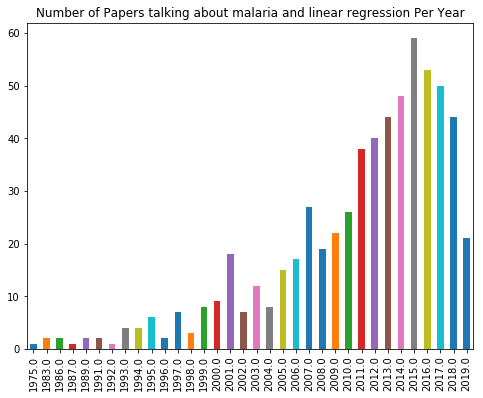

In [12]:
machine = "linear regression"
out_file = "_".join(machine.split())
data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

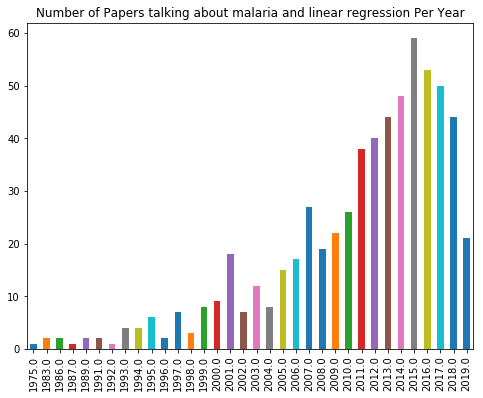

In [13]:
machine = "linear regression"
out_file = "_".join(machine.split())
data = pd.read_table("Data/"+out_file+".txt", index_col='Id')
data['year'].value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers talking about malaria and %s Per Year'% machine,
                                              figsize=(8, 6))
plt.savefig('Plots/malaria_%s.png' % out_file)

The above quick analysis seems to show that the algorithms popularity may have peeked in 2015, but have been on the decline ever since. We need to investigat this further. 

### Data Cleaning and analysis

In [71]:
#cancer_df = pd.read_table("Data/cancer_ml_counts.txt")
def clean_df(df,disease):
    df['date'] = pd.to_datetime(df['First_Paper'], errors='coerce')
    df['year_%s' % disease] = df.date.dt.year
    df  = df[['ML_algorithm','Count','year_%s' % disease]]
    df.columns = ['ML_algorithm','%s_Count' % disease,'year_%s' % disease]
    
    return df

We observe that it takes an average of ten years for technoilogies, especialy machine learning techniques to diffuse from cancer to malaria research. 

In [28]:
#(marged_data.Cancer_Count/cancer_total)*100

In [27]:
(marged_data.mal_Count/malaria_total)*100

ML_algorithm
machine learning                 0.085823
neural networks                  0.036310
support vector machine           0.034109
k-nearest neighbor               0.006602
linear regression                0.715190
random forests                   0.011003
logistic regression              1.422677
convolutional neural networks    0.003301
Name: mal_Count, dtype: float64

### It takes a long time for machine learning models to diffuse into malaria

What are the major points here:

Interestingly, Pubmed cancer "DNA sequencing" shows 5484 papers with the first in 1978, while Pubmed malaria "DNA sequencing" shows 186 papers with the first in 1988. So even other technologies take 10 years to diffuse from cancer to malaria.
- Why do we have this observation?
- How can we improve on this, and I guess this is where we can introduce the machine learning challenge to improve how these tools diffuse to malaria research. 


#### Outline
- Inroduce malaria
- Introduce machine learning
- Introduce the high level approaches used to study malaria
- Link that to the deluge of data, including the H3Afrca... and this meanse there is need to adopt technologies that can handle and combine data of disparate / different types
- Genetic predesposition? A coonection, though not very strong, exist between these two diseases...
- Cancer research outside Africa is multi-disciplinary. Compyter scientists and biologisst work together for cancer research, especially for tool developemnt and data analysis. However, in Africa, where majority of the malaria research is conducted, there is little interdisciplinary colaboration, especially attracting computer scientists to genomic research
- 


### References
1. https://doi.org/10.1016/j.csbj.2014.11.005
2. https://royalsocietypublishing.org/doi/pdf/10.1098/rsob.180127
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/
4. 

Clean Up:
- Create function that can be reused throughout
- Tell a story through the analysis
- Display Key Figures
- Write results to file for reproducibility, and clean up the code
- Code should create subdirectories when they do not exist